VGG-16 Model

In [ ]:
import numpy as np
import os
import time
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Loading Data

In [ ]:

data_path = '/content/drive/MyDrive/cat_dog_horse'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
  
        print('Input image shape:', x.shape)
        img_data_list.append(x)
img_data = np.array(img_data_list)

print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

Loaded the images of dataset-horses

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224,

In [ ]:
# Define the number of classes
num_classes = 3
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [ ]:
#setting labels 
#0 for cat
#1 for dog
#2 for horse
labels[0:202]=2
labels[202:404]=1
labels[404:606]=0

In [ ]:
names = ['horses','dogs','cats']

In [ ]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [ ]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()

553467904/553467096 [==============================] - 7s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
#using our own custom layers
last_layer = model.get_layer('fc2').output
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#freezing all other layers except the last layer
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

In [ ]:
custom_vgg_model.layers[3].trainable

False

In [ ]:
custom_vgg_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
t=time.time()
hist = custom_vgg_model.fit(X_train, y_train, batch_size=32, epochs=8
                            , verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (t - time.time()))
(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Epoch 1/13
16/16 [==============================] - 55s 1s/step - loss: 0.6430 - accuracy: 0.7909 - val_loss: 0.0704 - val_accuracy: 0.9672
Epoch 2/13
16/16 [==============================] - 5s 315ms/step - loss: 0.0310 - accuracy: 0.9918 - val_loss: 0.0507 - val_accuracy: 0.9754
Epoch 3/13
16/16 [==============================] - 5s 314ms/step - loss: 0.0139 - accuracy: 0.9984 - val_loss: 0.0532 - val_accuracy: 0.9754
Epoch 4/13
16/16 [==============================] - 5s 312ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0451 - val_accuracy: 0.9672
Epoch 5/13
16/16 [==============================] - 5s 311ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0354 - val_accuracy: 0.9754
Epoch 6/13
16/16 [==============================] - 5s 312ms/step - loss: 9.8477e-04 - accuracy: 1.0000 - val_loss: 0.0300 - val_accuracy: 0.9836
Epoch 7/13
16/16 [==============================] - 5s 312ms/step - loss: 4.5460e-04 - accuracy: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9754


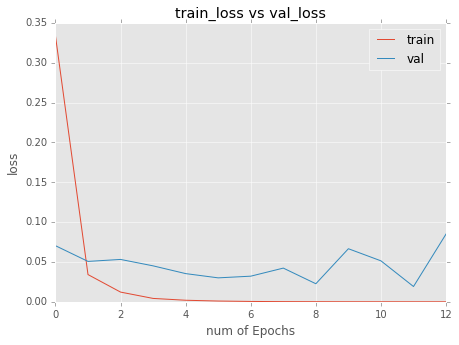

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(13)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

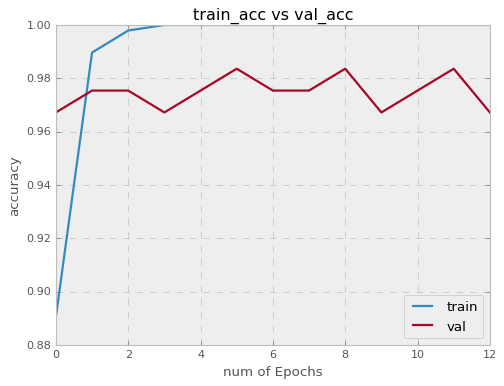

In [ ]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])